In [9]:
# MBAN 6110T Data Science I Assignment 3
# author: Shaokun Zhang
# date: 2023-07-07
# data science class progress: Introduced linear regression models, not yet introduced hyper parameter tuning.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Tasks
1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

### Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

There are no missing values, but there are zeros in the dataset, such as yr_renovated, and date is not usable in its format. View and condition should be one hot coded, which will be handled with sklearn kit

<Axes: xlabel='price', ylabel='Count'>

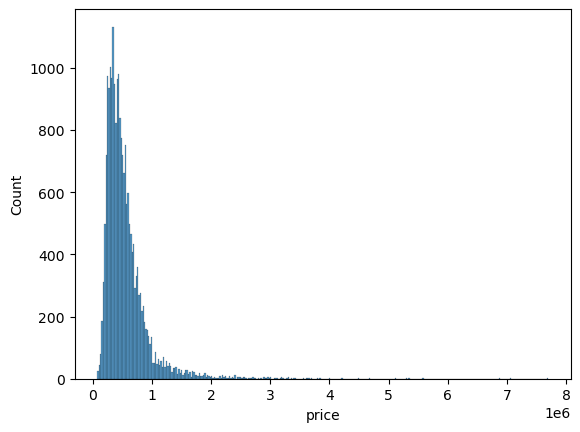

In [12]:
# remove outliers
sns.histplot(df['price'])

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The housing market has many outliers. It is normal for the market, but it will greatly impact the modeling, so we need to remove as many outliers as possible for the accuracy of the model. There a lot of houses with price over 2e06, so we remove any data higher than this point and keep the skewness.

In [14]:
df = df[df['price'] < 2.0e+06]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21408 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21408 non-null  int64  
 1   date           21408 non-null  object 
 2   price          21408 non-null  float64
 3   bedrooms       21408 non-null  int64  
 4   bathrooms      21408 non-null  float64
 5   sqft_living    21408 non-null  int64  
 6   sqft_lot       21408 non-null  int64  
 7   floors         21408 non-null  float64
 8   waterfront     21408 non-null  int64  
 9   view           21408 non-null  int64  
 10  condition      21408 non-null  int64  
 11  grade          21408 non-null  int64  
 12  sqft_above     21408 non-null  int64  
 13  sqft_basement  21408 non-null  int64  
 14  yr_built       21408 non-null  int64  
 15  yr_renovated   21408 non-null  int64  
 16  zipcode        21408 non-null  int64  
 17  lat            21408 non-null  float64
 18  long  

A total of 200 entries are deleted, less than 1% of total data, and it reduces the influende of skewness greatly.

Duplicates: Since the dataset contains house price with date, rating, it is likely to contain data generated from the same day, that have identical price and other metrics. But essentially they all indicate one single house, so remove the duplication. Before that, remove the id of the dataset since it prevents the duplication detection.

In [16]:
df = df.drop('id', axis=1)
df.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


No duplicates, good. Now move on to year and month feature. Retrieve them from hte date column, and onecode seasons.

In [17]:
# date: convert to year and remove original date
df['year'] = pd.to_datetime(df['date'], format='%Y%').dt.year
df['month'] = pd.to_datetime(df['date'], format='%Y%m%').dt.month
df = df.drop('date', axis=1)
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21408, dtype: int64

However, month is categorical value, convert it to seasonal dummy variables

In [18]:
df['month']

0        10
1        12
2         2
3        12
4         2
         ..
21608     5
21609     2
21610     6
21611     1
21612    10
Name: month, Length: 21408, dtype: int64

In [19]:
df['spring'] = df.apply(lambda row: 1 if row['month'] in [3,4,5] else 0, axis=1)
df['summer'] = df.apply(lambda row: 1 if row['month'] in [6,7,8] else 0, axis=1)
df['fall'] = df.apply(lambda row: 1 if row['month'] in [9,10,11] else 0, axis=1)
df['winter'] = df.apply(lambda row: 1 if row['month'] in [12,1,2] else 0, axis=1)

In [20]:
# substitute yr_renovated to the year that it was built.
# Create function to sub the year
df['yr_renovated'] = df.apply(lambda row: row['yr_built'] if row['yr_renovated'] == 0 else row['yr_renovated'], axis=1)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year,month,spring,summer,fall,winter
count,2.140800e+04,21408.000000,21408.000000,21408.000000,2.140800e+04,21408.000000,21408.000000,21408.000000,21408.000000,21408.000000,...,21408.000000,21408.000000,21408.000000,21408.000000,21408.000000,21408.000000,21408.000000,21408.000000,21408.000000,21408.000000
mean,5.189366e+05,3.361547,2.098188,2051.792040,1.503550e+04,1.490704,0.005325,0.216835,3.408399,7.627849,...,47.559486,-122.213649,1972.213472,12716.013453,2014.322917,6.574879,0.301336,0.292881,0.234492,0.171291
std,2.866135e+05,0.924628,0.747455,863.061355,4.143364e+04,0.539259,0.072781,0.730245,0.649709,1.137447,...,0.139018,0.141234,668.705251,27333.467444,0.467602,3.115772,0.458849,0.455095,0.423691,0.376772
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.027000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,47.469200,-122.329000,1480.000000,5100.000000,2014.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7.577500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,47.570700,-122.230000,1830.000000,7600.000000,2014.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,6.350000e+05,4.000000,2.500000,2520.000000,1.055650e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,47.678300,-122.124000,2340.000000,10026.000000,2015.000000,9.000000,1.000000,1.000000,0.000000,0.000000
max,1.999950e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,47.777600,-121.315000,5790.000000,871200.000000,2015.000000,12.000000,1.000000,1.000000,1.000000,1.000000


Zipcode and month do not provide further information, remove them.

In [21]:
df = df.drop('month', axis=1)
df = df.drop('zipcode', axis=1)

Normalize data for regression. Year column starts from 1900 and ends on 2015, normalize these data using minmax algorithm. This will be used for ols regression.

In [22]:
year_data = df[['year', 'yr_renovated', 'yr_built']]
scaler = MinMaxScaler()
year_normalized = scaler.fit_transform(year_data)
df_nor = df
df_nor[['year', 'yr_renovated', 'yr_built']] = year_normalized
df_nor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21408 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21408 non-null  float64
 1   bedrooms       21408 non-null  int64  
 2   bathrooms      21408 non-null  float64
 3   sqft_living    21408 non-null  int64  
 4   sqft_lot       21408 non-null  int64  
 5   floors         21408 non-null  float64
 6   waterfront     21408 non-null  int64  
 7   view           21408 non-null  int64  
 8   condition      21408 non-null  int64  
 9   grade          21408 non-null  int64  
 10  sqft_above     21408 non-null  int64  
 11  sqft_basement  21408 non-null  int64  
 12  yr_built       21408 non-null  float64
 13  yr_renovated   21408 non-null  float64
 14  lat            21408 non-null  float64
 15  long           21408 non-null  float64
 16  sqft_living15  21408 non-null  int64  
 17  sqft_lot15     21408 non-null  int64  
 18  year  

We don't know whether the lat and long variables have significant impact on the price or not. So check the correlation.

In [23]:
correlation = df_nor.corr()['price'].drop('price')  # Calculate correlation with the 'price' column and drop 'price' from the results
print(correlation)

bedrooms         0.315724
bathrooms        0.507522
sqft_living      0.680123
sqft_lot         0.101821
floors           0.278850
waterfront       0.142338
view             0.344589
condition        0.037520
grade            0.681087
sqft_above       0.585197
sqft_basement    0.285765
yr_built         0.063701
yr_renovated     0.113902
lat              0.363346
long             0.041282
sqft_living15    0.602053
sqft_lot15       0.090642
year             0.006029
spring           0.025953
summer           0.014342
fall            -0.018552
winter          -0.028069
Name: price, dtype: float64


Here, latitite is highly related, long is not. For the purpose of simplicity, we use ridge regression model to minimize the least significant variables

### OLS regression model

In [24]:
ols_model = ols('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + lat + long + sqft_living15 + year + spring + summer + fall + winter', 
                data = df_nor).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2788.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:15:27   Log-Likelihood:            -2.8605e+05
No. Observations:               21408   AIC:                         5.721e+05
Df Residuals:                   21388   BIC:                         5.723e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.931e+07   9.35e+05    -31.338

As conclusion from the summary, the model reached a r squared of 0.713, which is good, and all the variables being kept are significant to the evaluation.

In [25]:
#  bedrooms + bathrooms + sqft_living + sqft_lot + floors 
#+ waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + lat + long + sqft_living15 + year + spring + summer + fall + winter'
pred_vals = ols_model.predict(df_nor[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade'
                                      ,'sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','year','spring','summer'
                                      ,'fall','winter']])

In [26]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df_nor['price']], axis=1)
res['error'] = res['y_hat'] - res['price']
res['sq_error'] = res['error']**2
print('MSE for OLS model: ', np.sqrt(res['sq_error'].mean()))

MSE for OLS model:  153707.9134949768


### Ridge regression model

In [27]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,spring,summer,fall,winter
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0.478261,47.5112,-122.257,1340,5650,0.0,0,0,1,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0.791304,47.7210,-122.319,1690,7639,0.0,0,0,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21408 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21408 non-null  float64
 1   bedrooms       21408 non-null  int64  
 2   bathrooms      21408 non-null  float64
 3   sqft_living    21408 non-null  int64  
 4   sqft_lot       21408 non-null  int64  
 5   floors         21408 non-null  float64
 6   waterfront     21408 non-null  int64  
 7   view           21408 non-null  int64  
 8   condition      21408 non-null  int64  
 9   grade          21408 non-null  int64  
 10  sqft_above     21408 non-null  int64  
 11  sqft_basement  21408 non-null  int64  
 12  yr_built       21408 non-null  float64
 13  yr_renovated   21408 non-null  float64
 14  lat            21408 non-null  float64
 15  long           21408 non-null  float64
 16  sqft_living15  21408 non-null  int64  
 17  sqft_lot15     21408 non-null  int64  
 18  year  

In [29]:
categorical_features = ['waterfront', 'spring', 'summer', 'fall', 'winter']
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year']
target = 'price'

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features], df[target], 
    test_size = 0.3, random_state = 2345)

In [31]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
# simple imputer fills missing value with average, KNNImputer, etc
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
# minmax transform the data between 0 and 1

# building processor
preprocessor = ColumnTransformer(transformers = [('cat', cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [32]:
ridge_regression = Pipeline(steps = [('preprocessor', preprocessor),
                                      ('regressor', Ridge(alpha = 0.001))
                                      ])
# higher alpha, more penalty
# how to know which hyper param is the best? hyper param tuning
ridge_regression.fit(X_train, y_train)
pred_ridge = ridge_regression.predict(X_test)
print('MSE value: ', np.sqrt(mean_squared_error(pred_ridge, y_test)))
print('R2 value: ', r2_score(pred_ridge, y_test))

MSE value:  151025.3702943528
R2 value:  0.6057426523124896


In [33]:
# ridge_regression.fit(X_train, y_train)

### Lasso Regression Model

In [34]:
lasso_regression = Pipeline(steps = [('preprocessor', preprocessor),
                                      ('regressor', Lasso(alpha = 0.001))
                                      ])
lasso_regression.fit(X_train, y_train)
pred_ridge = lasso_regression.predict(X_test)
print('MSE value: ', np.sqrt(mean_squared_error(pred_ridge, y_test)))
print('R2 value: ', r2_score(pred_ridge, y_test))

MSE value:  151025.31215876737
R2 value:  0.6057448686706286


c:\Users\13343\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.979e+12, tolerance: 1.249e+11
  model = cd_fast.enet_coordinate_descent(


### Elasticnet Regression

In [35]:
ela_regression = Pipeline(steps = [('preprocessor', preprocessor),
                                      ('regressor', ElasticNet(alpha = 0.001, l1_ratio=0.5))
                                      ])
ela_regression.fit(X_train, y_train)
pred_ridge = ela_regression.predict(X_test)
print('MSE value: ', np.sqrt(mean_squared_error(pred_ridge, y_test)))
print('R2 value: ', r2_score(pred_ridge, y_test))

MSE value:  151516.22095174514
R2 value:  0.5902159936141992


c:\Users\13343\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.861e+14, tolerance: 1.249e+11
  model = cd_fast.enet_coordinate_descent(


2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

By comparison of the MSE and R2 metric of Ridge, Lasso and Elasticnet regression model, the result shows that Ridge and Lasso perform slightly better than Elasticnet.
The R2 values of Lasso and Ridge are both 0.606. The r squared metric for OLS is 0.712, but its MSE is slightly higher than  the other models by around 2700 units. 

Comparing the metrics calculated from the models, since the lasso, ridge and elastic net reomve variables from the dataset, they will describe less variance than the OLS model. Instead, we use MSE as the metric. The least MSE value is generated by Lasso model with 151025.31215876737. And it generates the most accurated result out of the four compared models. Lasso should be applied in this case.

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

Out of the regression models used to fit the data, the OLS model has the highest r2 score of 0.712, indicating that the model explains approximately 71.2% of the variability in house prices. As the summary shown by the OLS regression model, the main drivers of house prices in King City include **latitude, grade, sqft_living, yr_built, view and sqft_above**. The rest of the parameters such as seasonality, waterfront, bedroom number also have less, but still significant impact on the price.

Below are a list of how much do the most important drivers impact the price.

- Latitude (lat): The coefficient is 5.576e+05, indicating that an increase in latitude is associated with an increase in house price by $557,600.

- Grade: The coefficient is 9.306e+04, indicating that a higher grade assigned to the house is associated with an increase in house price by $93,060.

- Square footage of living area (sqft_living): The coefficient is 67.8934, indicating that, on average, each additional square foot of living area is associated with an increase in house price by $67.89.

- Year Built: The coefficient is -2800.4426, suggesting that, on average, each year of the house's age is associated with a decrease in house price by $2,800.

- View: The coefficient is 4.276e+04, suggesting that better views from the house are associated with an increase in house price by $42,760.

- The square footage of the interior housing space that is above ground level (sqft_above): The coefficient is 39.66, suggesting that better views from the house are associated with an increase in house price by $39.66.

Note that these values only account for the scope of this city. For example, despite the money impact of the latitude seems to be high, it only means the houses on the north side of this city is likely to be more expensive than the ones on the south side. The bigger difference of one driver value to its mean value is, the less predictable will the actual price be. 